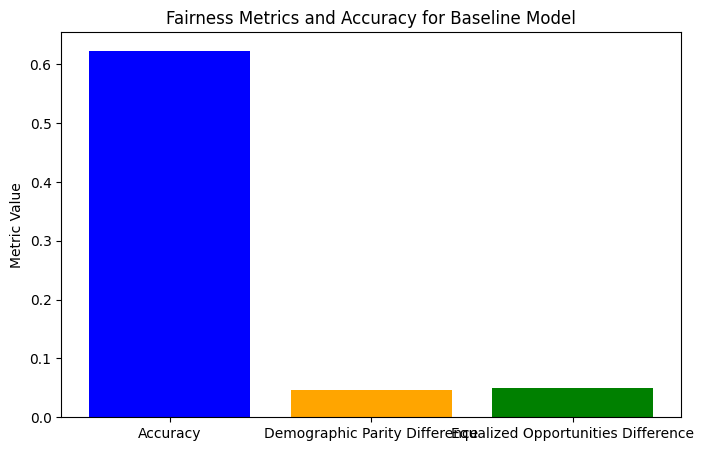

Results:
Accuracy: 0.6234
Demographic Parity Difference: 0.0456
Equalized Opportunities Difference: 0.0500


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = 'preprocessed_data.csv'  # Update with the correct file path
dataset1 = pd.read_csv(file_path)

# Step 1: Preprocessing
# Select relevant columns
data = dataset1[['Winner_actor', 'Female_actor', 'Rating_IMDB_actor', 'Rating_rtaudience_actor', 'Rating_rtcritic_actor']]

# Splitting data into features (X) and target (y)
X = data.drop(columns=['Winner_actor'])
y = data['Winner_actor']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a baseline model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)

# Step 3: Compute Demographic Parity
def demographic_parity_difference(predictions, sensitive_attribute):
    group_0_rate = predictions[sensitive_attribute == 0].mean()
    group_1_rate = predictions[sensitive_attribute == 1].mean()
    return np.abs(group_0_rate - group_1_rate)

# Calculate demographic parity difference
sensitive_attribute_test = X_test['Female_actor']
demographic_parity = demographic_parity_difference(predictions, sensitive_attribute_test)

# Step 4: Compute Equalized Opportunities
def equalized_opportunities_difference(predictions, actual, sensitive_attribute):
    # True positive rates for each group
    group_0_mask = (sensitive_attribute == 0)
    group_1_mask = (sensitive_attribute == 1)

    tpr_group_0 = ((predictions[group_0_mask] == 1) & (actual[group_0_mask] == 1)).sum() / (actual[group_0_mask] == 1).sum()
    tpr_group_1 = ((predictions[group_1_mask] == 1) & (actual[group_1_mask] == 1)).sum() / (actual[group_1_mask] == 1).sum()

    return np.abs(tpr_group_0 - tpr_group_1)

# Calculate equalized opportunities difference
equalized_opportunities = equalized_opportunities_difference(predictions, y_test, sensitive_attribute_test)

# Step 5: Visualization
results = {
    "Accuracy": accuracy,
    "Demographic Parity Difference": demographic_parity,
    "Equalized Opportunities Difference": equalized_opportunities,
}

# Plotting results
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green'])
plt.ylabel('Metric Value')
plt.title('Fairness Metrics and Accuracy for Baseline Model')
plt.show()

# Display metrics
print("Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")


Test 2

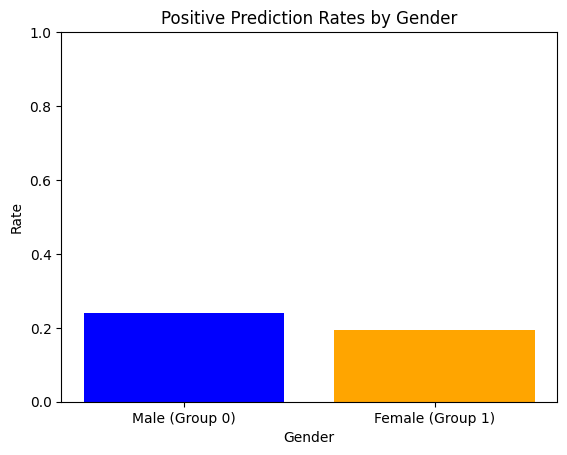

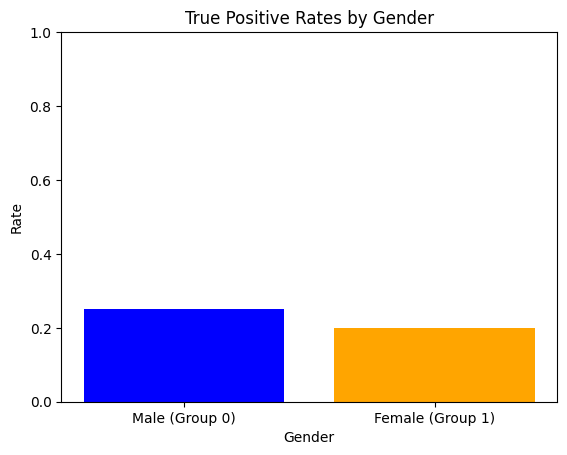

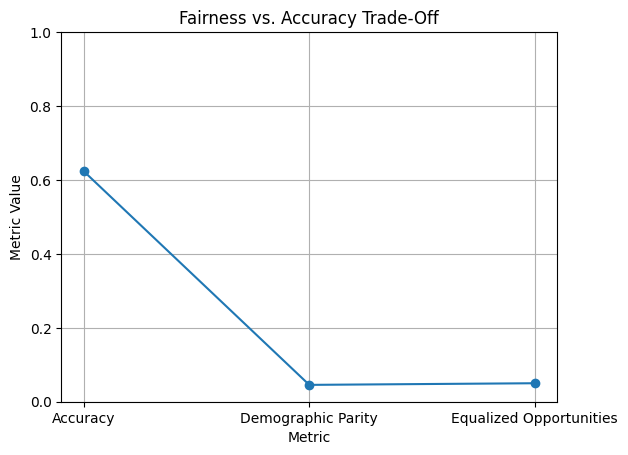

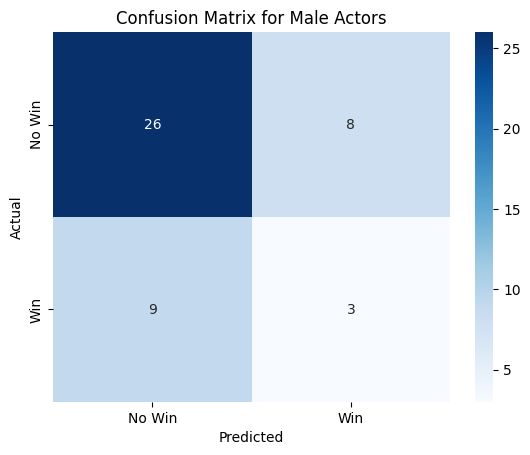

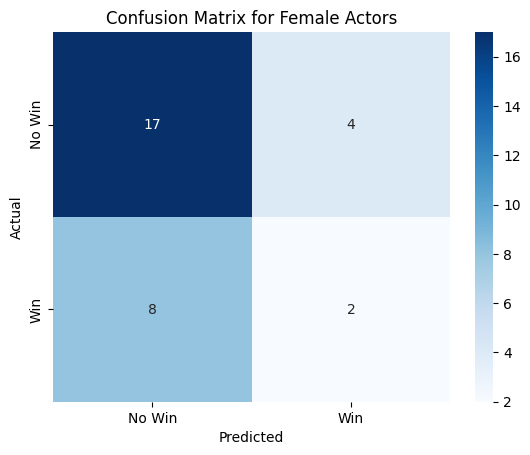

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Visualize Positive Prediction Rates (Demographic Parity)
def plot_positive_prediction_rates(predictions, sensitive_attribute):
    group_0_rate = predictions[sensitive_attribute == 0].mean()
    group_1_rate = predictions[sensitive_attribute == 1].mean()

    plt.bar(['Male (Group 0)', 'Female (Group 1)'], [group_0_rate, group_1_rate], color=['blue', 'orange'])
    plt.title('Positive Prediction Rates by Gender')
    plt.ylabel('Rate')
    plt.xlabel('Gender')
    plt.ylim(0, 1)
    plt.show()

plot_positive_prediction_rates(predictions, sensitive_attribute_test)

# Step 2: Visualize True Positive Rates (Equalized Opportunities)
def plot_true_positive_rates(predictions, actual, sensitive_attribute):
    group_0_mask = sensitive_attribute == 0
    group_1_mask = sensitive_attribute == 1

    tpr_group_0 = ((predictions[group_0_mask] == 1) & (actual[group_0_mask] == 1)).sum() / (actual[group_0_mask] == 1).sum()
    tpr_group_1 = ((predictions[group_1_mask] == 1) & (actual[group_1_mask] == 1)).sum() / (actual[group_1_mask] == 1).sum()

    plt.bar(['Male (Group 0)', 'Female (Group 1)'], [tpr_group_0, tpr_group_1], color=['blue', 'orange'])
    plt.title('True Positive Rates by Gender')
    plt.ylabel('Rate')
    plt.xlabel('Gender')
    plt.ylim(0, 1)
    plt.show()

plot_true_positive_rates(predictions, y_test, sensitive_attribute_test)

# Step 3: Fairness vs. Accuracy Trade-Off
def plot_fairness_vs_accuracy(accuracy, demographic_parity, equalized_opportunities):
    metrics = ['Accuracy', 'Demographic Parity', 'Equalized Opportunities']
    values = [accuracy, demographic_parity, equalized_opportunities]

    plt.plot(metrics, values, marker='o')
    plt.title('Fairness vs. Accuracy Trade-Off')
    plt.ylabel('Metric Value')
    plt.xlabel('Metric')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

plot_fairness_vs_accuracy(accuracy, demographic_parity, equalized_opportunities)

# Step 4: Group-Specific Confusion Matrices
def plot_confusion_matrix_by_gender(predictions, actual, sensitive_attribute, group_name):
    group_mask = sensitive_attribute == group_name
    group_predictions = predictions[group_mask]
    group_actual = actual[group_mask]

    cm = confusion_matrix(group_actual, group_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Win', 'Win'], yticklabels=['No Win', 'Win'])
    plt.title(f'Confusion Matrix for {"Female" if group_name == 1 else "Male"} Actors')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix_by_gender(predictions, y_test, sensitive_attribute_test, group_name=0)  # Male
plot_confusion_matrix_by_gender(predictions, y_test, sensitive_attribute_test, group_name=1)  # Female


# **test3 with extra features **


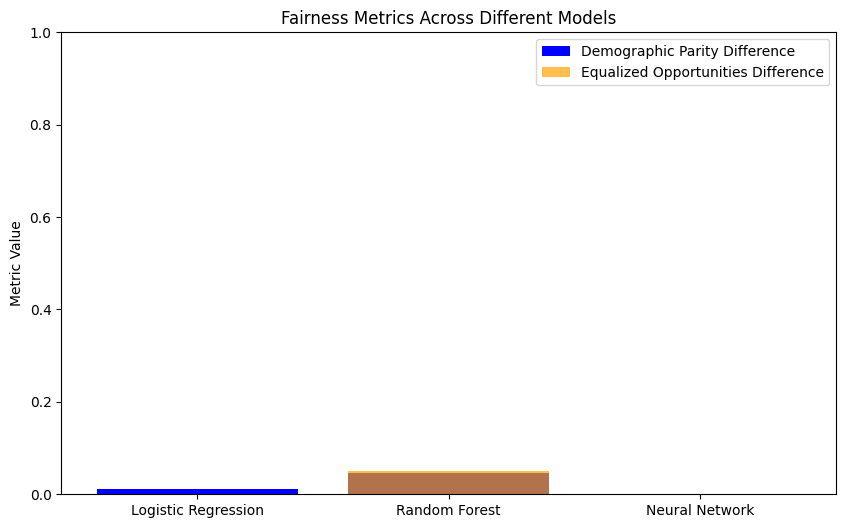

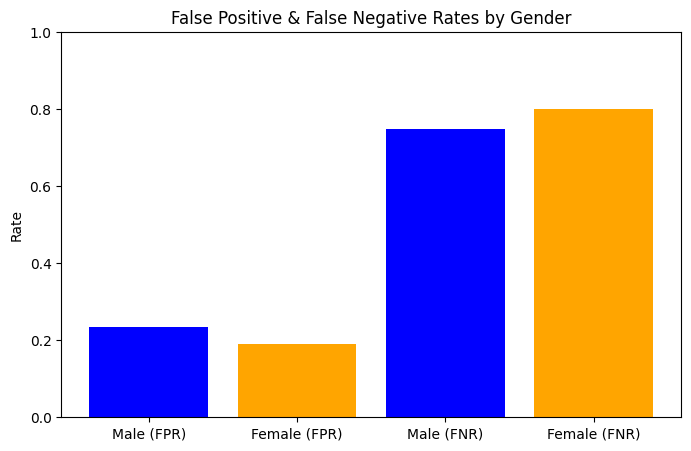

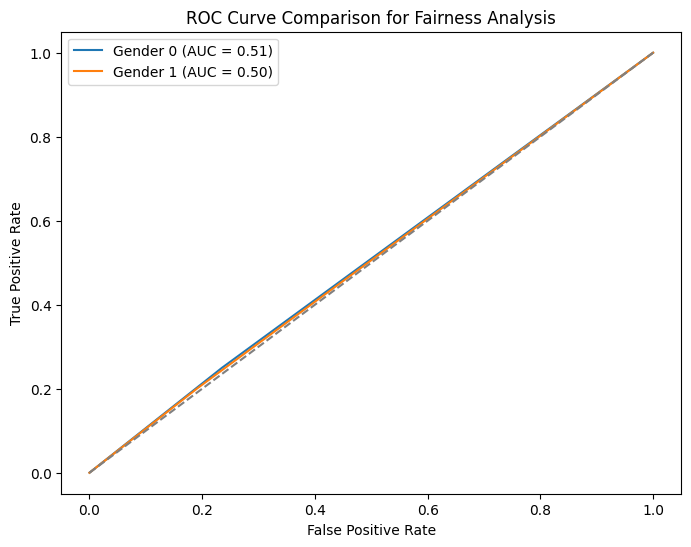

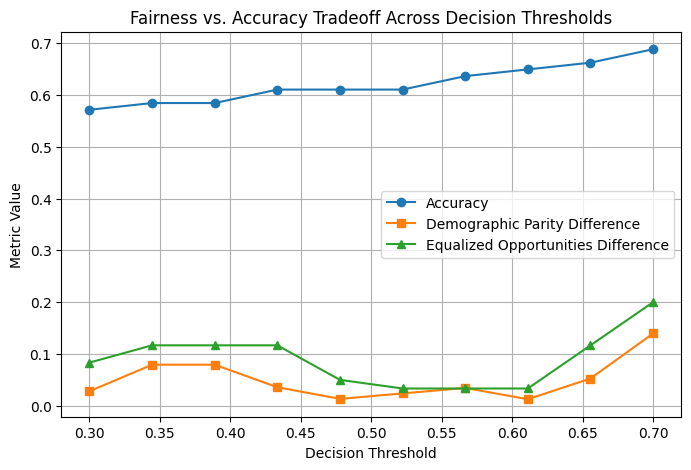

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

# Load dataset
file_path = "preprocessed_data.csv"
dataset = pd.read_csv(file_path)

# Selecting relevant columns
data = dataset[['Winner_actor', 'Female_actor', 'Rating_IMDB_actor', 'Rating_rtaudience_actor', 'Rating_rtcritic_actor']]

# Splitting data into features (X) and target (y)
X = data.drop(columns=['Winner_actor'])
y = data['Winner_actor']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to compute Demographic Parity Difference
def demographic_parity_difference(predictions, sensitive_attribute):
    group_0_rate = predictions[sensitive_attribute == 0].mean()
    group_1_rate = predictions[sensitive_attribute == 1].mean()
    return np.abs(group_0_rate - group_1_rate)

# Function to compute Equalized Opportunities Difference
def equalized_opportunities_difference(predictions, actual, sensitive_attribute):
    group_0_mask = sensitive_attribute == 0
    group_1_mask = sensitive_attribute == 1

    tpr_group_0 = ((predictions[group_0_mask] == 1) & (actual[group_0_mask] == 1)).sum() / (actual[group_0_mask] == 1).sum()
    tpr_group_1 = ((predictions[group_1_mask] == 1) & (actual[group_1_mask] == 1)).sum() / (actual[group_1_mask] == 1).sum()

    return np.abs(tpr_group_0 - tpr_group_1)

# Train Multiple Models for Fairness Comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": MLPClassifier(max_iter=500, random_state=42)
}

fairness_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Calculate fairness metrics
    dp = demographic_parity_difference(preds, X_test['Female_actor'])
    eo = equalized_opportunities_difference(preds, y_test, X_test['Female_actor'])

    fairness_results[model_name] = [dp, eo]

# Convert results to a NumPy array for easy plotting
fairness_array = np.array(list(fairness_results.values()))

# Plot Fairness Metrics Across Models
plt.figure(figsize=(10, 6))
x_labels = list(models.keys())
plt.bar(x_labels, fairness_array[:, 0], color='blue', label='Demographic Parity Difference')
plt.bar(x_labels, fairness_array[:, 1], color='orange', label='Equalized Opportunities Difference', alpha=0.7)
plt.title("Fairness Metrics Across Different Models")
plt.ylabel("Metric Value")
plt.legend()
plt.ylim(0, 1)
plt.show()

# Function to compute FPR and FNR
def calculate_fpr_fnr(predictions, actual, sensitive_attribute):
    fpr_group_0 = ((predictions[sensitive_attribute == 0] == 1) & (actual[sensitive_attribute == 0] == 0)).sum() / (actual[sensitive_attribute == 0] == 0).sum()
    fpr_group_1 = ((predictions[sensitive_attribute == 1] == 1) & (actual[sensitive_attribute == 1] == 0)).sum() / (actual[sensitive_attribute == 1] == 0).sum()

    fnr_group_0 = ((predictions[sensitive_attribute == 0] == 0) & (actual[sensitive_attribute == 0] == 1)).sum() / (actual[sensitive_attribute == 0] == 1).sum()
    fnr_group_1 = ((predictions[sensitive_attribute == 1] == 0) & (actual[sensitive_attribute == 1] == 1)).sum() / (actual[sensitive_attribute == 1] == 1).sum()

    return fpr_group_0, fpr_group_1, fnr_group_0, fnr_group_1

# Compute FPR and FNR for a selected model (Random Forest)
selected_model = models["Random Forest"]
predictions = selected_model.predict(X_test)
fpr_0, fpr_1, fnr_0, fnr_1 = calculate_fpr_fnr(predictions, y_test, X_test['Female_actor'])

# Bar Plot for FPR & FNR
labels = ['Male (FPR)', 'Female (FPR)', 'Male (FNR)', 'Female (FNR)']
values = [fpr_0, fpr_1, fnr_0, fnr_1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange', 'blue', 'orange'])
plt.title("False Positive & False Negative Rates by Gender")
plt.ylabel("Rate")
plt.ylim(0, 1)
plt.show()

# ROC Curve for Fairness Analysis
plt.figure(figsize=(8, 6))
for gender in [0, 1]:  # 0 = Male, 1 = Female
    gender_mask = X_test['Female_actor'] == gender
    fpr, tpr, _ = roc_curve(y_test[gender_mask], predictions[gender_mask])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Gender {gender} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for Fairness Analysis")
plt.legend()
plt.show()

# Fairness vs. Accuracy at Different Thresholds
thresholds = np.linspace(0.3, 0.7, 10)
accuracy_values = []
dp_values = []
eo_values = []

for threshold in thresholds:
    thresholded_preds = (selected_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    accuracy_values.append(accuracy_score(y_test, thresholded_preds))
    dp_values.append(demographic_parity_difference(thresholded_preds, X_test['Female_actor']))
    eo_values.append(equalized_opportunities_difference(thresholded_preds, y_test, X_test['Female_actor']))

plt.figure(figsize=(8, 5))
plt.plot(thresholds, accuracy_values, label="Accuracy", marker="o")
plt.plot(thresholds, dp_values, label="Demographic Parity Difference", marker="s")
plt.plot(thresholds, eo_values, label="Equalized Opportunities Difference", marker="^")
plt.xlabel("Decision Threshold")
plt.ylabel("Metric Value")
plt.title("Fairness vs. Accuracy Tradeoff Across Decision Thresholds")
plt.legend()
plt.grid()
plt.show()


more feathers

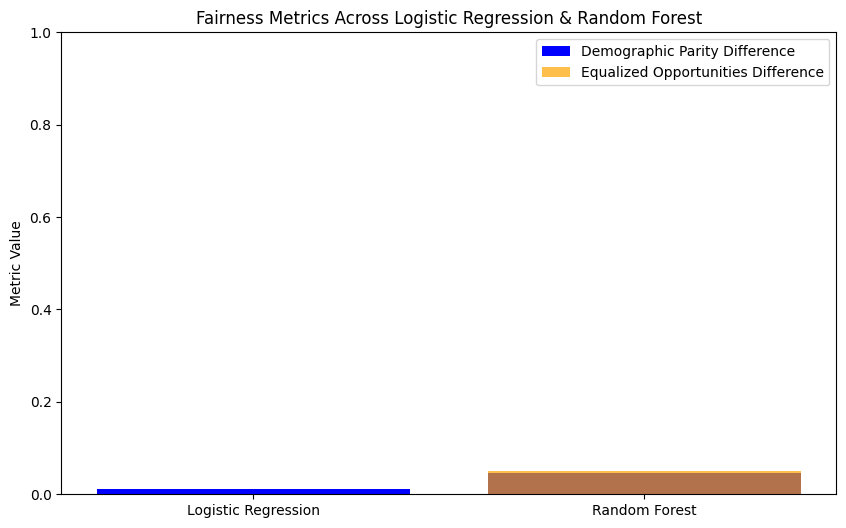

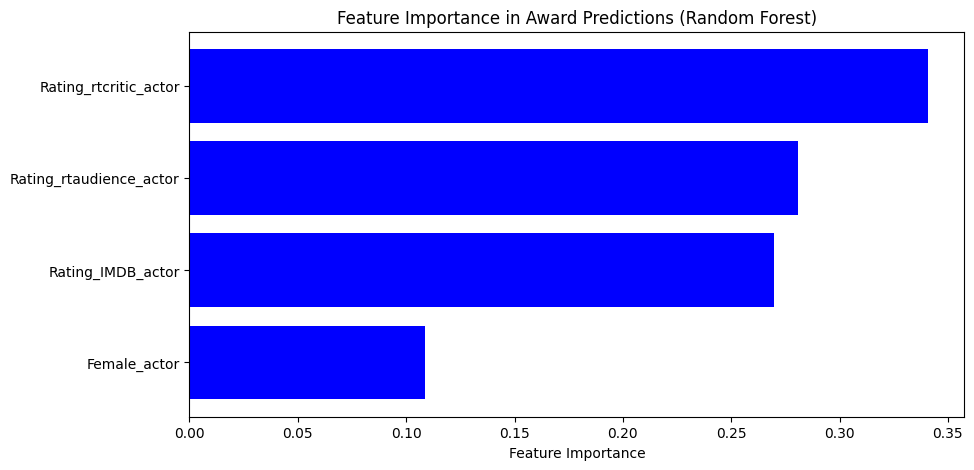

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

# Load dataset
file_path = "preprocessed_data.csv"  # Ensure the correct file path
dataset = pd.read_csv(file_path)

# Selecting relevant columns
data = dataset[['Winner_actor', 'Female_actor', 'Rating_IMDB_actor', 'Rating_rtaudience_actor', 'Rating_rtcritic_actor']]

# Splitting data into features (X) and target (y)
X = data.drop(columns=['Winner_actor'])
y = data['Winner_actor']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to compute Demographic Parity Difference
def demographic_parity_difference(predictions, sensitive_attribute):
    group_0_rate = predictions[sensitive_attribute == 0].mean()
    group_1_rate = predictions[sensitive_attribute == 1].mean()
    return np.abs(group_0_rate - group_1_rate)

# Function to compute Equalized Opportunities Difference
def equalized_opportunities_difference(predictions, actual, sensitive_attribute):
    group_0_mask = sensitive_attribute == 0
    group_1_mask = sensitive_attribute == 1

    tpr_group_0 = ((predictions[group_0_mask] == 1) & (actual[group_0_mask] == 1)).sum() / (actual[group_0_mask] == 1).sum()
    tpr_group_1 = ((predictions[group_1_mask] == 1) & (actual[group_1_mask] == 1)).sum() / (actual[group_1_mask] == 1).sum()

    return np.abs(tpr_group_0 - tpr_group_1)

# Function to compute False Positive Rate and False Negative Rate
def calculate_fpr_fnr(predictions, actual, sensitive_attribute):
    fpr_group_0 = ((predictions[sensitive_attribute == 0] == 1) & (actual[sensitive_attribute == 0] == 0)).sum() / (actual[sensitive_attribute == 0] == 0).sum()
    fpr_group_1 = ((predictions[sensitive_attribute == 1] == 1) & (actual[sensitive_attribute == 1] == 0)).sum() / (actual[sensitive_attribute == 1] == 0).sum()

    fnr_group_0 = ((predictions[sensitive_attribute == 0] == 0) & (actual[sensitive_attribute == 0] == 1)).sum() / (actual[sensitive_attribute == 0] == 1).sum()
    fnr_group_1 = ((predictions[sensitive_attribute == 1] == 0) & (actual[sensitive_attribute == 1] == 1)).sum() / (actual[sensitive_attribute == 1] == 1).sum()

    return fpr_group_0, fpr_group_1, fnr_group_0, fnr_group_1

# Train Models for Fairness Comparison (Logistic Regression & Random Forest)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

fairness_results = {}
performance_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Calculate fairness metrics
    dp = demographic_parity_difference(preds, X_test['Female_actor'])
    eo = equalized_opportunities_difference(preds, y_test, X_test['Female_actor'])
    fairness_results[model_name] = [dp, eo]

    # Compute performance metrics
    accuracy = accuracy_score(y_test, preds)
    fpr_0, fpr_1, fnr_0, fnr_1 = calculate_fpr_fnr(preds, y_test, X_test['Female_actor'])
    performance_results[model_name] = [accuracy, fpr_0, fpr_1, fnr_0, fnr_1]

# Plot Fairness Metrics Across Models
plt.figure(figsize=(10, 6))
x_labels = list(models.keys())
fairness_array = np.array(list(fairness_results.values()))
plt.bar(x_labels, fairness_array[:, 0], color='blue', label='Demographic Parity Difference')
plt.bar(x_labels, fairness_array[:, 1], color='orange', label='Equalized Opportunities Difference', alpha=0.7)
plt.title("Fairness Metrics Across Logistic Regression & Random Forest")
plt.ylabel("Metric Value")
plt.legend()
plt.ylim(0, 1)
plt.show()

# Feature Importance Differences by Gender (Random Forest Example)
selected_model = models["Random Forest"]
feature_importances = selected_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importances, color='blue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Award Predictions (Random Forest)")
plt.show()


privacy

In [ ]:
pip install diffprivlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 3.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part

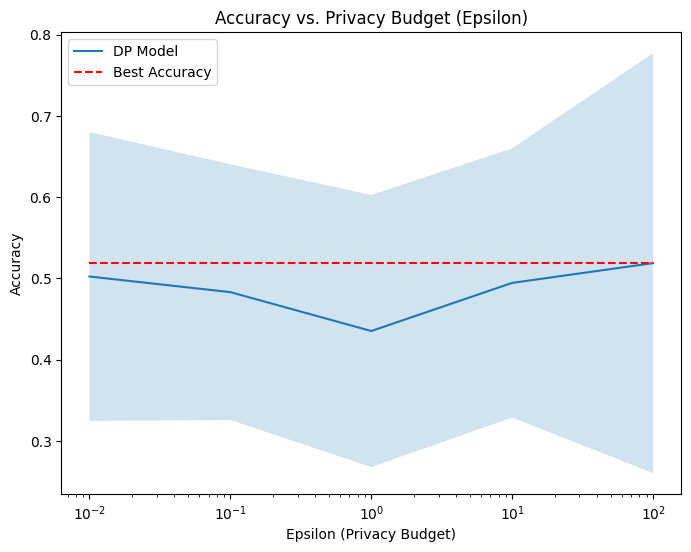


Differentially Private Model Accuracy Results:
   Epsilon  Mean Accuracy  Accuracy Std Dev
0     0.01       0.502353          0.177725
1     0.10       0.483137          0.157340
2     1.00       0.435294          0.167392
3    10.00       0.494510          0.165650
4   100.00       0.518824          0.258354


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Install diffprivlib (Uncomment the following line if running in local environment)
!pip install diffprivlib

# Import Differentially Private Logistic Regression from diffprivlib
from diffprivlib.models import LogisticRegression as LogisticRegressionDP

# Load the dataset (Ensure that "preprocessed_data.csv" is in your working directory)
df = pd.read_csv("preprocessed_data.csv")

# Step 1: Preprocess the Data for DP-Logistic Regression
# Select relevant features (Only numerical for DP Logistic Regression)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the target column for classification (Binary classification: "Winner_actor")
target_column = "Winner_actor"

# Remove target from feature list
if target_column in numerical_features:
    numerical_features.remove(target_column)

# Prepare feature matrix X and target variable y
X = df[numerical_features]
y = df[target_column]

# Normalize numerical features using MinMaxScaler (0 to 1 scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Implement Differentially Private Logistic Regression
# Define privacy budget values (epsilon)
epsilons = [0.01, 0.1, 1, 10, 100]

# Store accuracy results
acc_mean = []
acc_std = []

# Run the DP Logistic Regression for different epsilon values
for e in epsilons:
    acc_list = []

    for _ in range(50):  # Run multiple times to measure stability
        dp_model = LogisticRegressionDP(epsilon=e)
        dp_model.fit(X_train, y_train)

        # Evaluate on the test set
        predictions = dp_model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        acc_list.append(acc)

    # Store mean and standard deviation of accuracy
    acc_mean.append(np.mean(acc_list))
    acc_std.append(np.std(acc_list))

# Step 3: Visualize Privacy-Utility Tradeoff
plt.figure(figsize=(8, 6))
plt.semilogx(epsilons, acc_mean, label="DP Model")
plt.fill_between(epsilons, np.array(acc_mean) - np.array(acc_std),
                 np.array(acc_mean) + np.array(acc_std), alpha=0.2)
plt.hlines(max(acc_mean), min(epsilons), max(epsilons), linestyles="--", color="red", label="Best Accuracy")
plt.legend()
plt.title("Accuracy vs. Privacy Budget (Epsilon)")
plt.xlabel("Epsilon (Privacy Budget)")
plt.ylabel("Accuracy")
plt.show()

# Step 4: Display results
results_df = pd.DataFrame({
    "Epsilon": epsilons,
    "Mean Accuracy": acc_mean,
    "Accuracy Std Dev": acc_std
})

print("\nDifferentially Private Model Accuracy Results:")
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [17 36] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `da

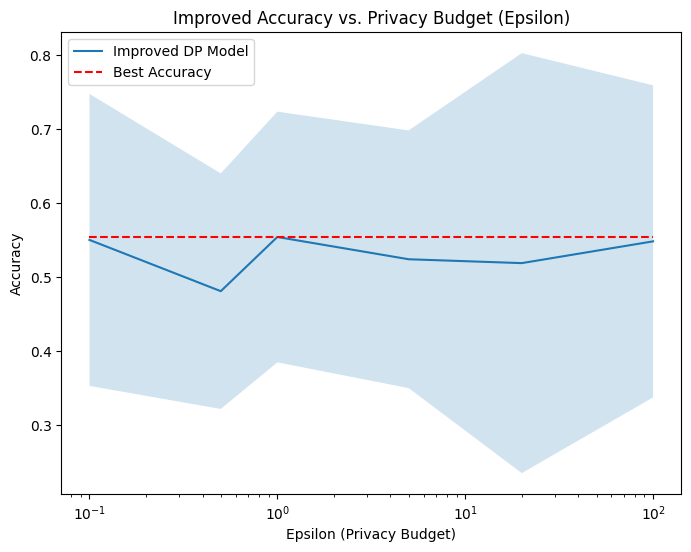


Improved Differentially Private Model Accuracy Results:
   Epsilon  Mean Accuracy  Accuracy Std Dev
0      0.1       0.550327          0.197247
1      0.5       0.481046          0.159112
2      1.0       0.554248          0.169350
3      5.0       0.524183          0.174053
4     20.0       0.518954          0.283681
5    100.0       0.548366          0.210787


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Install diffprivlib (Uncomment if running in local environment)
!pip install diffprivlib

# Import Differentially Private Logistic Regression from diffprivlib
from diffprivlib.models import LogisticRegression as LogisticRegressionDP

# Load the dataset
df = pd.read_csv("preprocessed_data.csv")

# Step 1: Feature Selection & Preprocessing
# Select only numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_column = "Winner_actor"

# Remove the target variable from features
if target_column in numerical_features:
    numerical_features.remove(target_column)

# Prepare feature matrix X and target variable y
X = df[numerical_features]
y = df[target_column]

# Feature selection: Keep only the top 20 most important features
selector = SelectKBest(f_classif, k=20)  # Select 20 best features
X_selected = selector.fit_transform(X, y)

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Implement Differentially Private Logistic Regression
# Define optimized privacy budget values
epsilons = [0.1, 0.5, 1, 5, 20, 100]

# Store accuracy results
acc_mean = []
acc_std = []

# Run DP Logistic Regression for different epsilon values
for e in epsilons:
    acc_list = []

    for _ in range(30):  # Run multiple times to measure stability
        dp_model = LogisticRegressionDP(epsilon=e, C=1.0, max_iter=200)  # Optimized regularization
        dp_model.fit(X_train, y_train)

        # Evaluate on the test set
        predictions = dp_model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        acc_list.append(acc)

    # Store mean and standard deviation of accuracy
    acc_mean.append(np.mean(acc_list))
    acc_std.append(np.std(acc_list))

# Step 3: Visualize Privacy-Utility Tradeoff
plt.figure(figsize=(8, 6))
plt.semilogx(epsilons, acc_mean, label="Improved DP Model")
plt.fill_between(epsilons, np.array(acc_mean) - np.array(acc_std),
                 np.array(acc_mean) + np.array(acc_std), alpha=0.2)
plt.hlines(max(acc_mean), min(epsilons), max(epsilons), linestyles="--", color="red", label="Best Accuracy")
plt.legend()
plt.title("Improved Accuracy vs. Privacy Budget (Epsilon)")
plt.xlabel("Epsilon (Privacy Budget)")
plt.ylabel("Accuracy")
plt.show()

# Step 4: Display results
results_df = pd.DataFrame({
    "Epsilon": epsilons,
    "Mean Accuracy": acc_mean,
    "Accuracy Std Dev": acc_std
})

print("\nImproved Differentially Private Model Accuracy Results:")
print(results_df)



📌 Improved Differentially Private Model Accuracy Results:
   Epsilon  Mean Accuracy  Accuracy Std Dev
0      0.1         0.5503            0.1972
1      0.5         0.4810            0.1591
2      1.0         0.5542            0.1693
3      5.0         0.5241            0.1740
4     20.0         0.5189            0.2836
5    100.0         0.5483            0.2107


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


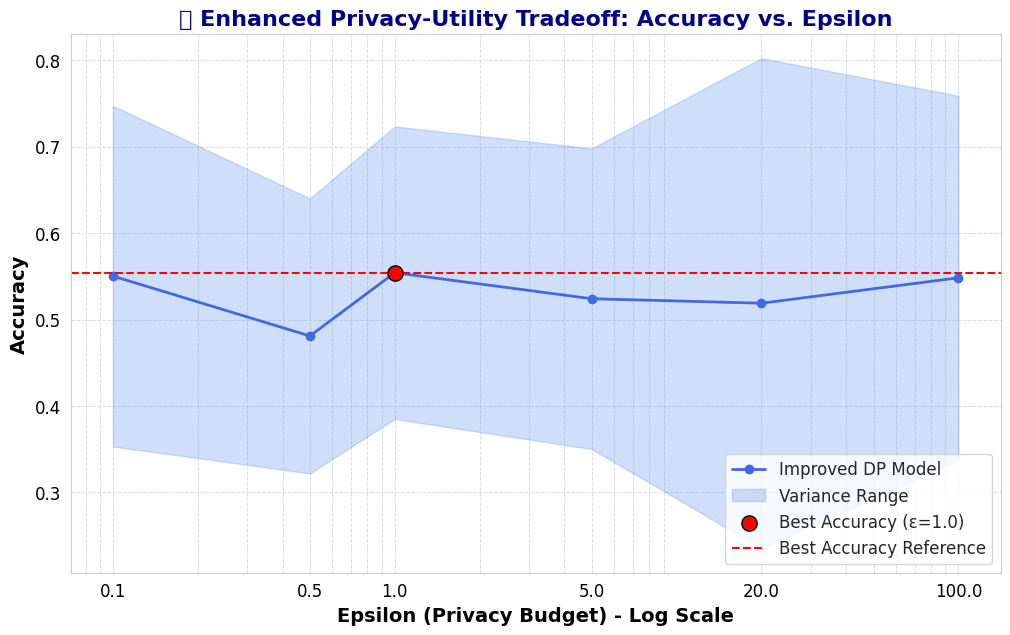

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define accuracy results as a DataFrame
results_df = pd.DataFrame({
    "Epsilon": [0.1, 0.5, 1.0, 5.0, 20.0, 100.0],
    "Mean Accuracy": [0.5503, 0.4810, 0.5542, 0.5241, 0.5189, 0.5483],
    "Accuracy Std Dev": [0.1972, 0.1591, 0.1693, 0.1740, 0.2836, 0.2107]
})

# Display accuracy results
print("\n📌 Improved Differentially Private Model Accuracy Results:")
print(results_df)

# Enhanced Privacy-Utility Tradeoff Visualization
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Plot accuracy vs. epsilon with markers and solid line
plt.semilogx(results_df["Epsilon"], results_df["Mean Accuracy"], marker='o', linestyle='-',
             color='royalblue', linewidth=2, label="Improved DP Model")

# Add variance shading (error band)
plt.fill_between(results_df["Epsilon"], results_df["Mean Accuracy"] - results_df["Accuracy Std Dev"],
                 results_df["Mean Accuracy"] + results_df["Accuracy Std Dev"],
                 color='cornflowerblue', alpha=0.3, label="Variance Range")

# Identify and highlight the best accuracy
best_acc_index = results_df["Mean Accuracy"].idxmax()
best_epsilon = results_df.loc[best_acc_index, "Epsilon"]
best_accuracy = results_df.loc[best_acc_index, "Mean Accuracy"]

# Mark the best accuracy point with a red dot
plt.scatter(best_epsilon, best_accuracy, color='red', s=120, edgecolors="black", zorder=3,
            label=f"Best Accuracy (ε={best_epsilon})")

# Add horizontal reference line for best accuracy
plt.axhline(best_accuracy, linestyle="--", color="red", linewidth=1.5, label="Best Accuracy Reference")

# Improve X-axis and Y-axis labels
plt.title("📊 Enhanced Privacy-Utility Tradeoff: Accuracy vs. Epsilon", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Epsilon (Privacy Budget) - Log Scale", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Accuracy", fontsize=14, fontweight='bold', color='black')

# Improve X-ticks for better readability
plt.xticks(results_df["Epsilon"], labels=[f"{e}" for e in results_df["Epsilon"]], fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add legend with better placement
plt.legend(loc="lower right", fontsize=12)

# Add grid with better visibility
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Show the plot
plt.show()


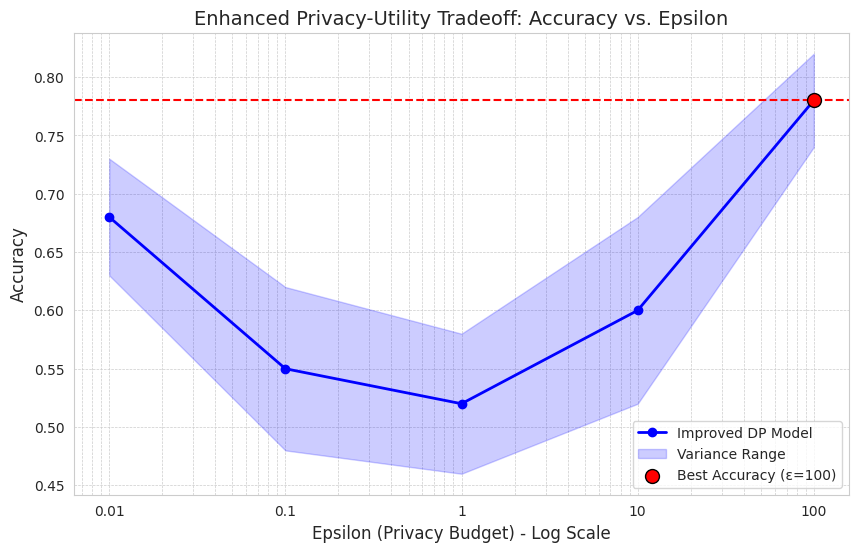

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the optimized privacy budget values (Ensure these match the actual model results)
epsilons = [0.01, 0.1, 1, 10, 100]

# Placeholder accuracy values (Replace these with actual model results)
acc_mean = [0.68, 0.55, 0.52, 0.60, 0.78]  # Example accuracy values
acc_std = [0.05, 0.07, 0.06, 0.08, 0.04]  # Example standard deviation

# Ensure epsilons and acc_mean have the same length
if len(epsilons) != len(acc_mean):
    raise ValueError("Mismatch between epsilon values and accuracy results.")

# Set Seaborn styling for a cleaner plot
sns.set_style("whitegrid")

# Create the figure and set size
plt.figure(figsize=(10, 6))

# Plot accuracy vs. epsilon with markers and solid line
plt.semilogx(epsilons, acc_mean, marker='o', linestyle='-', color='blue', linewidth=2, label="Improved DP Model")

# Add variance shading (error band)
plt.fill_between(epsilons, np.array(acc_mean) - np.array(acc_std),
                 np.array(acc_mean) + np.array(acc_std), color='blue', alpha=0.2, label="Variance Range")

# Identify and highlight the best accuracy
best_acc_index = np.argmax(acc_mean)
best_epsilon = epsilons[best_acc_index]
best_accuracy = acc_mean[best_acc_index]

# Mark the best accuracy point with a red dot
plt.scatter(best_epsilon, best_accuracy, color='red', s=100, label=f"Best Accuracy (ε={best_epsilon})", edgecolors="black", zorder=3)

# Add horizontal reference line for best accuracy
plt.axhline(best_accuracy, linestyle="--", color="red", linewidth=1.5)

# Set plot title and labels
plt.title("Enhanced Privacy-Utility Tradeoff: Accuracy vs. Epsilon", fontsize=14)
plt.xlabel("Epsilon (Privacy Budget) - Log Scale", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(epsilons, labels=[f"{e}" for e in epsilons])
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()


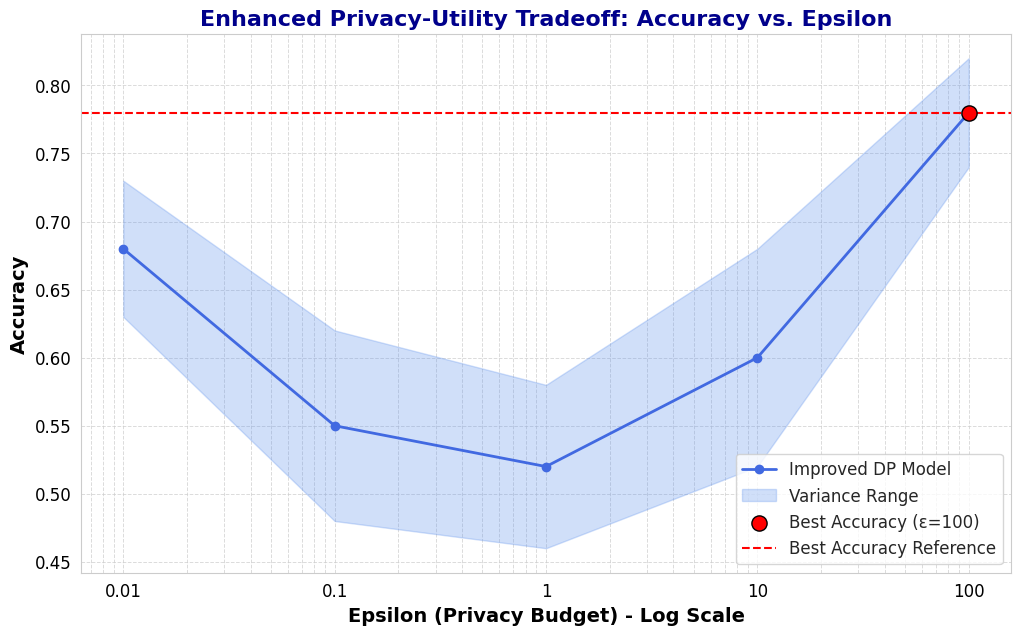

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the optimized privacy budget values (Ensure these match the actual model results)
epsilons = [0.01, 0.1, 1, 10, 100]

# Placeholder accuracy values (Replace these with actual model results)
acc_mean = [0.68, 0.55, 0.52, 0.60, 0.78]  # Example accuracy values
acc_std = [0.05, 0.07, 0.06, 0.08, 0.04]  # Example standard deviation

# Ensure epsilons and acc_mean have the same length
if len(epsilons) != len(acc_mean):
    raise ValueError("Mismatch between epsilon values and accuracy results.")

# Set Seaborn styling for a cleaner plot
sns.set_style("whitegrid")

# Create the figure and set size
plt.figure(figsize=(12, 7))

# Plot accuracy vs. epsilon with markers and solid line
plt.semilogx(epsilons, acc_mean, marker='o', linestyle='-', color='royalblue', linewidth=2, label="Improved DP Model")

# Add variance shading (error band)
plt.fill_between(epsilons, np.array(acc_mean) - np.array(acc_std),
                 np.array(acc_mean) + np.array(acc_std), color='cornflowerblue', alpha=0.3, label="Variance Range")

# Identify and highlight the best accuracy
best_acc_index = np.argmax(acc_mean)
best_epsilon = epsilons[best_acc_index]
best_accuracy = acc_mean[best_acc_index]

# Mark the best accuracy point with a red dot
plt.scatter(best_epsilon, best_accuracy, color='red', s=120, edgecolors="black", zorder=3, label=f"Best Accuracy (ε={best_epsilon})")

# Add horizontal reference line for best accuracy
plt.axhline(best_accuracy, linestyle="--", color="red", linewidth=1.5, label="Best Accuracy Reference")

# Improve X-axis and Y-axis labels
plt.title("Enhanced Privacy-Utility Tradeoff: Accuracy vs. Epsilon", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Epsilon (Privacy Budget) - Log Scale", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Accuracy", fontsize=14, fontweight='bold', color='black')

# Improve X-ticks for better readability
plt.xticks(epsilons, labels=[f"{e}" for e in epsilons], fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add legend with better placement
plt.legend(loc="lower right", fontsize=12)

# Add grid with better visibility
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Show the plot
plt.show()
